# Esercitazione 9

**29 Aprile 2024**

*Gradiente e gradiente coniugato*

In [1]:
import numpy as np
import numpy.linalg as npl
import scipy as sp
import scipy.linalg as spl
import matplotlib.pyplot as plt

## Esercizio 1
Implementare la funzione **steepestdescent(A,b,x0,itmax,tol)** che implementa il metodo di discesa più ripida del gradiente per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione

- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

In [22]:
def SteepestDescent(A, b, x0, itmax, toll):
    n, m = A.shape
    if n != m:
        # matrice non quadrata
        return None, None, None, None

    x = x0
    r = A @ x - b
    p = -r
    it = 0

    nb = np.linalg.norm(b)
    err = np.linalg.norm(r) / nb
    vsol = [x]
    verr = [err]

    while it < itmax and err >= toll:
        it += 1
        Ap = A @ p

        alpha = -(r.T @ p) / (p.T @ Ap)
        x = x + alpha * p
        vsol.append(x)

        r = r + alpha * Ap

        err = np.linalg.norm(r) / nb
        verr.append(err)
        # Direzione opposta alla direzione del gradiente
        p = -r

    return x, verr, vsol, it

## Esercizio 1-Bis
Implementare la funzione **steepestdescent_CL(A,b,x0,itmax,X,Y,Z,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k.

N.B: f(x) è il funzionale quadratico da minimizzare (f(x)= <Ax,x>-<b,x>) ,
X,Y sono la discretizzazione del piano su cui costruire Z (ottenuta valutando f sui punti della griglia)

## Esercizio 2
Implementare la funzione **conjugate_gradient(A,b,x0,itmax,tol)** che implementa il metodo del gradiente coniugato per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione
- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

In [21]:
def ConjugateGradient(A, b, x0, itmax, toll):
    n, m = A.shape
    if n != m:
        # matrice non quadrata
        return None, None, None, None

    x = x0
    r = A @ x - b
    p = -r
    it = 0

    nb = np.linalg.norm(b)
    err = np.linalg.norm(r) / nb
    vsol = [x]
    verr = [err]

    while it < itmax and err > toll:
        it += 1
        Ap = A @ p

        alpha = -(r.T @ p) / (p.T @ Ap)
        x = x + alpha * p
        vsol.append(x)

        rtr = r.T @ r
        r = r + alpha * Ap
        gamma = r.T @ r / rtr
        err = np.linalg.norm(r) / nb
        verr.append(err)

        # La nuova direzione appartiene al piano individuato da -r e p. gamma è scelto in maniera tale che la nuova direzione
        # sia coniugata rispetto alla direzione precedente( che geometricamente significa che punti verso il centro)
        p = -r + gamma * p

    return x, verr, vsol, it

## Esercizio 2-Bis
Implementare la funzione **conjugate_gradient_CL(A,b,x0,itmax,X,Y,Z,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k

## Test didattici per il caso n=2, visualizzando le curve di livello

Risolvere il sistema lineare Ax=b, dove A=np.array([[8,4],[4,3]]) e b=np.array([8,10]), utilizzando
il metodo del gradiente e del gradiente coniugato con la visualizzazione grafica delle curve di livello e della soluzione ad ogni iterazione. Si selezioni l'iterato iniziale x0=[0,0], itmax=200
tol=1e-10. Si confrontino le iterazioni effettuate da ciascuno dei due metodi e si visualizzi  $ \frac{||r^{(k)}||_2} {||b||_2}$ ad ogni iterazione.

Soluzione Steepest:  [-2.  6.]
Soluzione Conjugate:  [-2.  6.]


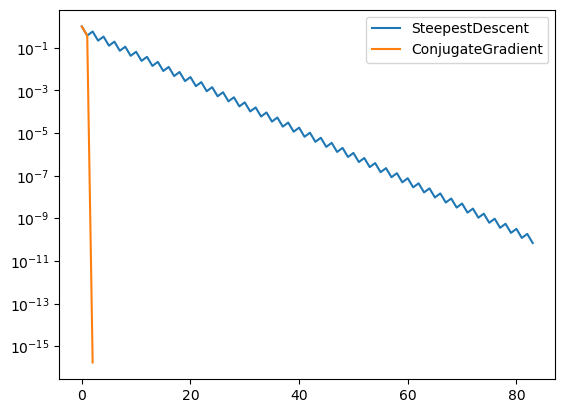

In [24]:
A = np.array([[8, 4], [4, 3]])
b = np.array([8, 10])

x0 = np.array([0, 0])
itmax = 200
toll = 1e-10

xs, errs, sols, its = SteepestDescent(A, b, x0, itmax, toll)
xc, errc, solc, itc = ConjugateGradient(A, b, x0, itmax, toll)
print("Soluzione Steepest: ", xs)
print("Soluzione Conjugate: ", xc)

plt.semilogy(np.arange(its + 1), errs)
plt.semilogy(np.arange(itc + 1), errc)
plt.legend(["SteepestDescent", "ConjugateGradient"])
plt.show()

## Esercizio 3
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$

- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson con ordine che va da 10 a 100 con step 2,  e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo del gradiente e del gradiente coniugato  

In [ ]:
def creaPoisson(n):
    # costruire una matrice di Poisson
    d = np.ones((n)) * 4
    e = -np.ones((n - 1,))
    f = -np.ones((n - 3,))
    A = np.diag(d) + np.diag(e, -1) + np.diag(e, 1) + np.diag(f, -3) + np.diag(f, 3)
    return A

Soluzione Steepest:  [[0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]
 [0.99999999]]
Soluzione Conjugate:  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


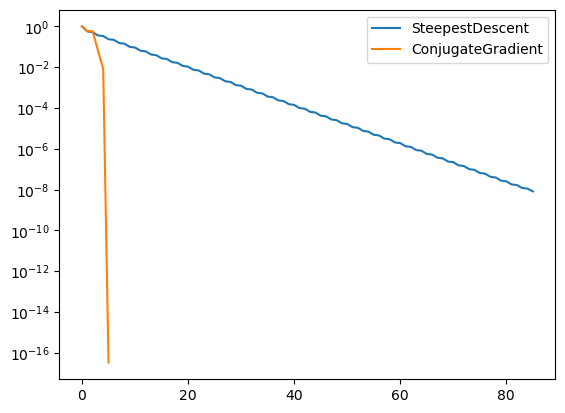

In [27]:
A = creaPoisson(10)
n = A.shape[0]
b = np.sum(A, axis=1).reshape(n, 1)
toll = 1e-8
itmax = 1000
x0 = np.zeros_like(b)

xs, errs, sols, its = SteepestDescent(A, b, x0, itmax, toll)
xc, errc, solc, itc = ConjugateGradient(A, b, x0, itmax, toll)

print("Soluzione Steepest: ", xs)
print("Soluzione Conjugate: ", xc)

plt.semilogy(np.arange(its + 1), errs)
plt.semilogy(np.arange(itc + 1), errc)
plt.legend(["SteepestDescent", "ConjugateGradient"])
plt.show()

## Esercizio 4
Consideriamo il sistema lineare Ax=b  dov A è  la matrice di Hilbert di dimensione 5, costruita usando la funzione hilbert(n) di scipy.linalg (A=scipy.linalg.hilbert(5)) in modo tale che la soluzione esatta sia $x = (1, 1, . . . , 1)^T$ .
Risolvere il sistema lineare usando sia il metodi del gradiente che il metodo del gradiente coniugato e confrontarne gli errori ad ogni iterazione.

Soluzione Steepest:  [[1.00131882]
 [0.98813393]
 [1.01676979]
 [1.01027142]
 [0.98224569]]
Soluzione Conjugate:  [[0.99997131]
 [1.00054232]
 [0.99764772]
 [1.00356527]
 [0.99825155]]


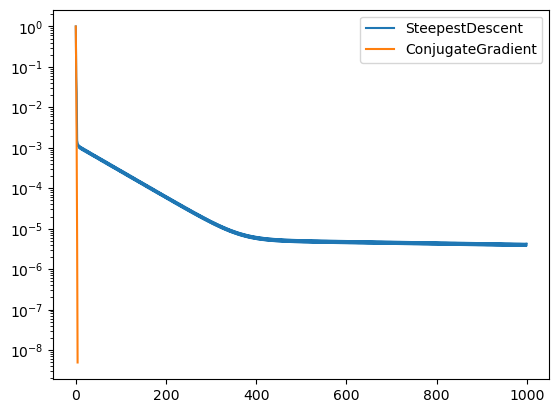

In [30]:
A = spl.hilbert(5)
n = A.shape[0]
b = np.sum(A, axis=1).reshape(n, 1)
x0 = np.zeros_like(b)

xs, errs, sols, its = SteepestDescent(A, b, x0, itmax, toll)
xc, errc, solc, itc = ConjugateGradient(A, b, x0, itmax, toll)

print("Soluzione Steepest: ", xs)
print("Soluzione Conjugate: ", xc)

plt.semilogy(np.arange(its + 1), errs)
plt.semilogy(np.arange(itc + 1), errc)
plt.legend(["SteepestDescent", "ConjugateGradient"])
plt.show()

## Esercizio 5
Importare il file creaG ed utilizzare le funzioni sottospecificate per creare, scelto $n$,  una matrice D di ordine $m=(n-2)^2$

*import creaG*

*G = creaG.numgrid(n)*

*D = creaG.delsq(G).todense().getA()*

Risolvere il sistema lineare Dx=b, con matrice G di ordine m=16 ed ordine m=400, (scegliere n in maniera opportuna), usando i metodi del gradiente e del gradiente coniugato. Confrontare gli errori su uno stesso grafico e giustifcare i risultati alla luce del risultato teorico della maggiorazione dell'errore per entrambi i metodi